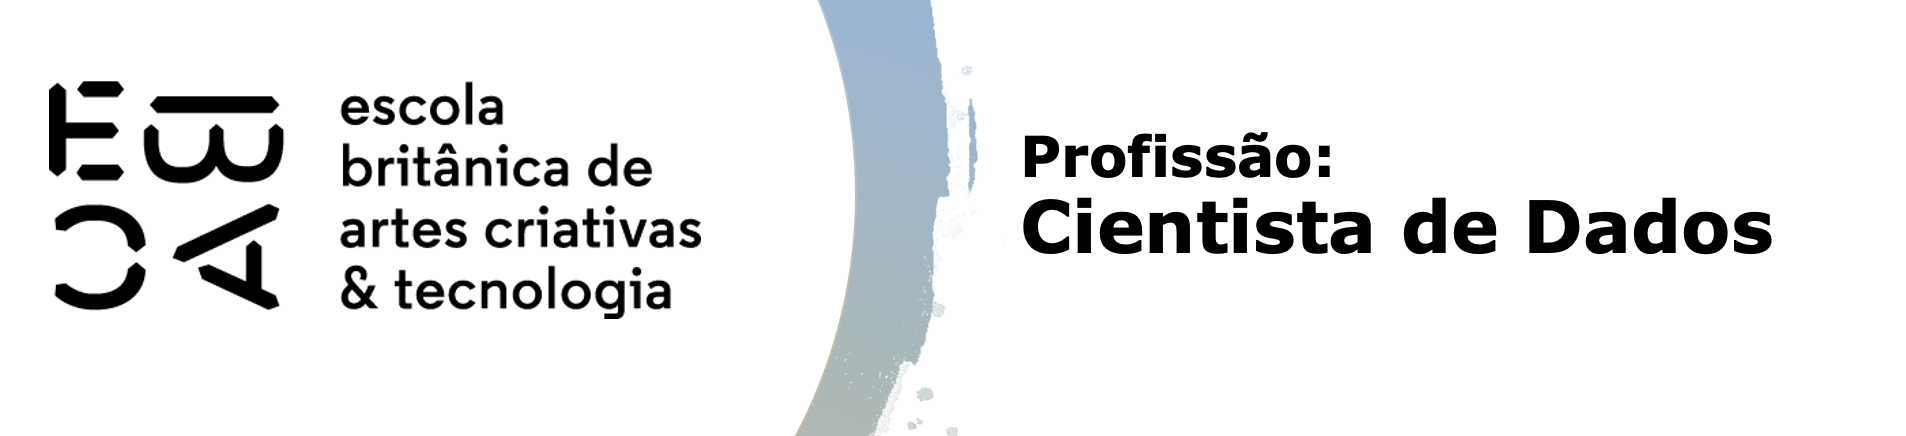

Módulo 21 <br> Professor: Lucas Serra

# Módulo 21 - Atividade 3

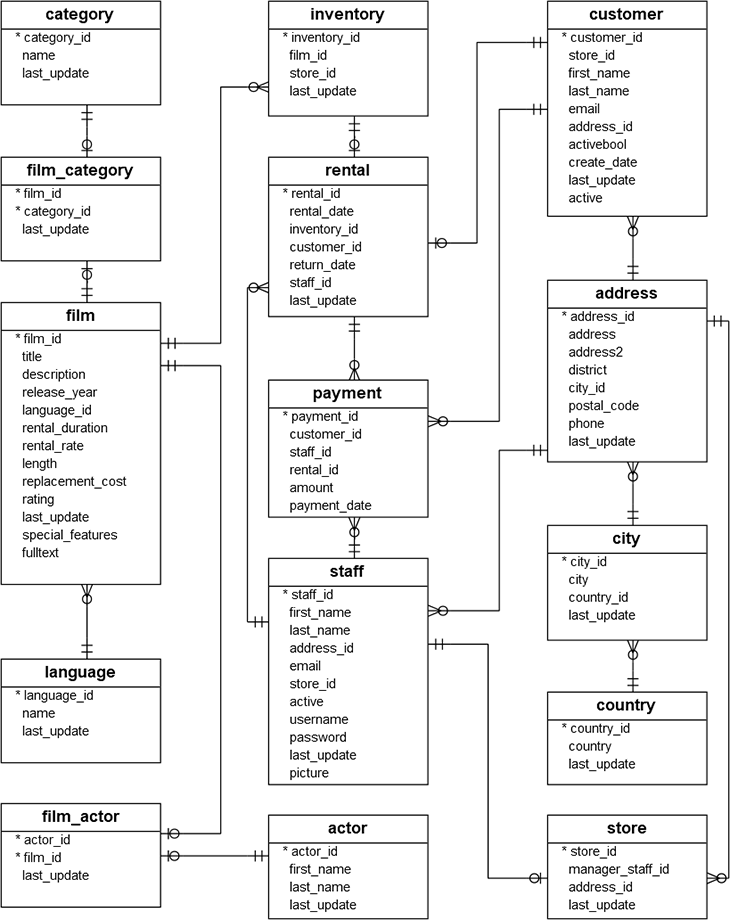

## 0. Importando as bibliotecas e pacotes necessários

In [ ]:
!pip install psycopg2

  Obtaining dependency information for psycopg2 from https://files.pythonhosted.org/packages/37/2c/5133dd3183a3bd82371569f0dd783e6927672de7e671b278ce248810b7f7/psycopg2-2.9.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 660.6 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.2 MB 653.6 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.2 MB 653.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.2 MB 328.2 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.2 MB 280.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.2 MB 291.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.2 MB 291.5 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.2 MB 312.9 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.2 MB 312.9 kB/s eta 0:00:04
   ---- -----------

In [ ]:
import psycopg2 as pg2
import pandas   as pd

## 1. Calcule a média por nome e sobrenome do ator da seguintes variáveis:
- rental_duration
- rental_rate
- length
- replacement_cost

```sql
SELECT first_name,
    last_name,
    ROUND(AVG(rental_duration), 2) AS avg_rental_duration,
    ROUND(AVG(rental_rate), 2) AS avg_rental_rate,
    ROUND(AVG(length), 2) AS avg_length,
    ROUND(AVG(replacement_cost), 2) AS avg_replacement_cost
FROM film
LEFT JOIN film_actor
    ON film.film_id = film_actor.film_id
LEFT JOIN actor
    ON film_actor.actor_id = actor.actor_id
WHERE first_name != 'na'
GROUP BY first_name, last_name
ORDER BY first_name, last_name;
```


In [ ]:
# Estabelecendo uma conexão com o banco de dados PostgreSQL local
conn = pg2.connect(host='localhost', port='5432', dbname='dvdrental', user='postgres', password='1234')

# Criando um cursor que será usado para executar consultas SQL
cur = conn.cursor()


In [ ]:
# Definindo a consulta SQL
query = '''
        SELECT first_name,
            last_name,
            ROUND(AVG(rental_duration), 2) AS avg_rental_duration,
            ROUND(AVG(rental_rate), 2) AS avg_rental_rate,
            ROUND(AVG(length), 2) AS avg_length,
            ROUND(AVG(replacement_cost), 2) AS avg_replacement_cost
        FROM film
        LEFT JOIN film_actor
            ON film.film_id = film_actor.film_id
        LEFT JOIN actor
            ON film_actor.actor_id = actor.actor_id
        WHERE first_name != 'na'
        GROUP BY first_name, last_name
        ORDER BY first_name, last_name;
        '''

# Executando a consulta SQL
cur.execute(query)

# Confirmando as alterações no banco de dados
conn.commit()


In [ ]:
# Buscando todos os registros retornados pela consulta
data = cur.fetchall()

# Fechando o cursor e a conexão com o banco de dados
cur.close()
conn.close()


In [ ]:
# Obtendo os nomes das colunas do resultado da consulta
col_names = [desc.name for desc in cur.description]

# Criando um DataFrame pandas com os dados e nomes das colunas obtidos
pd.DataFrame(data=data, columns=col_names)

,first_name,last_name,avg_rental_duration,avg_rental_rate,avg_length,avg_replacement_cost
0,Adam,Grant,5.28,2.77,122.39,22.93
1,Adam,Hopper,4.86,2.81,112.27,19.49
2,Al,Garland,5.12,2.76,106.38,19.87
3,Alan,Dreyfuss,5.04,2.84,111.30,19.36
4,Albert,Johansson,5.06,3.29,126.64,22.47
...,...,...,...,...,...,...
194,Will,Wilson,5.06,3.05,115.97,19.96
195,William,Hackman,4.78,3.14,129.07,20.06
196,Woody,Hoffman,4.58,2.99,120.84,19.70
197,Woody,Jolie,4.35,2.60,114.94,19.41


## 2. Calcule a soma de amount (preço total do aluguel) por nome, sobrenome e email do cliente (customer) e indique os 10 clientes que mais gastaram e os 10 que menos gastaram.


In [ ]:
# Estabelecendo uma conexão com o banco de dados PostgreSQL local
conn = pg2.connect(host='localhost',
                   port='5432',
                   dbname='dvdrental',
                   user='postgres',
                   password='1234')

# Criando um cursor que será usado para executar consultas SQL
cur = conn.cursor()

# Definindo a consulta SQL
query = '''
        SELECT first_name,
            last_name,
            email,
            SUM(amount) AS sum_amount
        FROM payment
        LEFT JOIN customer
            ON payment.customer_id = customer.customer_id
        GROUP BY first_name, last_name, email
        ORDER BY sum_amount;
        '''

# Executando a consulta SQL
cur.execute(query)

# Confirmando as alterações no banco de dados
conn.commit()

# Buscando todos os registros retornados pela consulta
data = cur.fetchall()

# Fechando o cursor e a conexão com o banco de dados
cur.close()
conn.close()

# Obtendo os nomes das colunas do resultado da consulta
col_names = [desc.name for desc in cur.description]

# Criando um DataFrame pandas com os dados e nomes das colunas obtidos
df = pd.DataFrame(data=data, columns=col_names)


### 2.1. Os 10 clientes que mais gastaram

In [ ]:
# 10 clientes que mais gastaram

df.sort_values(by='sum_amount', ascending=False).head(n=10)

10 clientes que MAIS gastaram:



,first_name,last_name,email,sum_amount
598,Eleanor,Hunt,eleanor.hunt@sakilacustomer.org,211.55
597,Karl,Seal,karl.seal@sakilacustomer.org,208.58
596,Marion,Snyder,marion.snyder@sakilacustomer.org,194.61
595,Rhonda,Kennedy,rhonda.kennedy@sakilacustomer.org,191.62
594,Clara,Shaw,clara.shaw@sakilacustomer.org,189.60
593,Tommy,Collazo,tommy.collazo@sakilacustomer.org,183.63
592,Ana,Bradley,ana.bradley@sakilacustomer.org,167.67
591,Curtis,Irby,curtis.irby@sakilacustomer.org,167.62
590,Marcia,Dean,marcia.dean@sakilacustomer.org,166.61
589,Mike,Way,mike.way@sakilacustomer.org,162.67


### 2.2. Os 10 clientes que menos gastaram

In [ ]:
# 10 clientes que MENOS gastaram

df.sort_values(by='sum_amount', ascending=True).head(n=10)

10 clientes que MENOS gastaram:



,first_name,last_name,email,sum_amount
0,Brian,Wyman,brian.wyman@sakilacustomer.org,27.93
1,Leona,Obrien,leona.obrien@sakilacustomer.org,32.90
2,Caroline,Bowman,caroline.bowman@sakilacustomer.org,37.87
3,Anthony,Schwab,anthony.schwab@sakilacustomer.org,47.85
4,Tiffany,Jordan,tiffany.jordan@sakilacustomer.org,49.88
5,Kirk,Stclair,kirk.stclair@sakilacustomer.org,50.83
6,Bobbie,Craig,bobbie.craig@sakilacustomer.org,52.81
7,Jo,Fowler,jo.fowler@sakilacustomer.org,54.85
8,Penny,Neal,penny.neal@sakilacustomer.org,56.84
9,Johnny,Turpin,johnny.turpin@sakilacustomer.org,57.81
